Test point: [66.86148412368033, 93.15196850119291]
Predicted label: 2


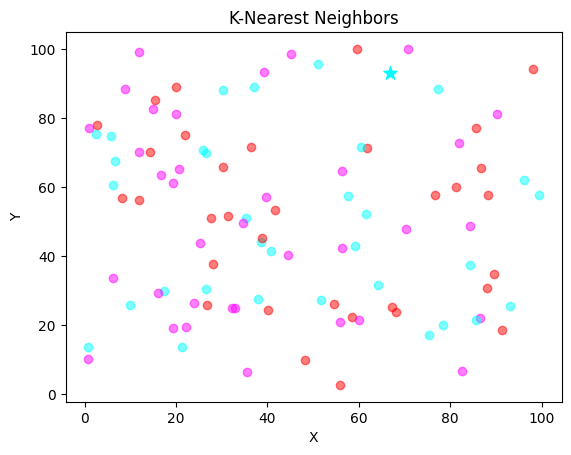

In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import random
import math

def generate_data(num_points, num_classes):
    data = []
    for i in range(num_points):
        x = random.uniform(0, 100)
        y = random.uniform(0, 100)
        label = random.randint(0, num_classes - 1)
        data.append([x, y, label])
    return data

def distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def knn(train_data, test_point, k):
    distances = []
    for data_point in train_data:
        dist = distance(data_point, test_point)
        distances.append((dist, data_point[2]))
    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]
    labels = [neighbor[1] for neighbor in nearest_neighbors]
    most_used = Counter(labels).most_common(1)
    return most_used[0][0]

def plot_data(train_data, test_point, predicted_label):
    colors = ['red','magenta', 'cyan']
    for point in train_data:
        plt.scatter(point[0], point[1], color=colors[point[2]], alpha=0.5)
    plt.scatter(test_point[0], test_point[1], color=colors[predicted_label], marker='*', s=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('K-Nearest Neighbors')
    plt.show()

train_data = generate_data(100, 3)
test_point = [random.uniform(0, 100), random.uniform(0, 100)]
print(f"Test point: {test_point}")
k = 4
predicted_label = knn(train_data, test_point, k)
print(f"Predicted label: {predicted_label}")
plot_data(train_data, test_point, predicted_label)
